In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv("Downloads/archive (1)/Genre Classification Dataset/train_data.txt", sep=":::", names=["ID", "Title", "Genre","Description"], engine='python')
train

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
train.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [5]:
train.isnull().sum() 

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [6]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [7]:
train["Description"] = train["Description"].apply(wordopt)
x = train["Description"]
y = train["Genre"]

Genre
 action           1315
 adult             590
 adventure         775
 animation         498
 biography         265
 comedy           7447
 crime             505
 documentary     13096
 drama           13613
 family            784
 fantasy           323
 game-show         194
 history           243
 horror           2204
 music             731
 musical           277
 mystery           319
 news              181
 reality-tv        884
 romance           672
 sci-fi            647
 short            5073
 sport             432
 talk-show         391
 thriller         1591
 war               132
 western          1032
Name: Description, dtype: int64


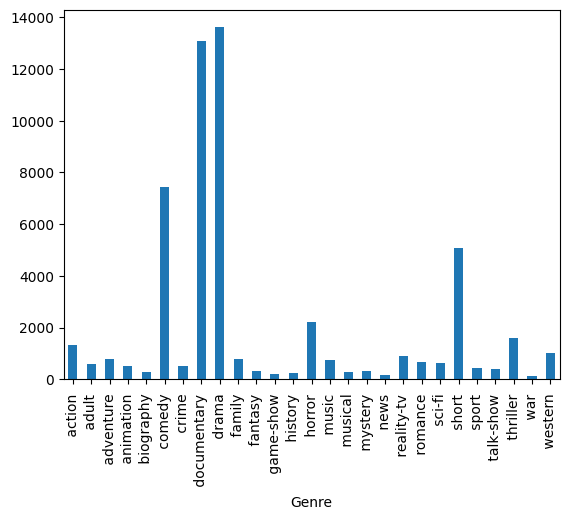

In [8]:
print(train.groupby(['Genre'])['Description'].count())
train.groupby(['Genre'])['Description'].count().plot(kind="bar")
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x)

In [10]:
test = pd.read_csv('Downloads/archive (1)/Genre Classification Dataset/test_data_solution.txt', sep=":::", names=["ID", "Title","Genre","Description"], engine="python")
test.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [11]:
test["Description"] = test["Description"].apply(wordopt)
x_new=test["Description"]
y_test=test["Genre"]
x_test = vectorization.transform(x_new)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train , y)


RandomForestClassifier(random_state=0)

In [13]:
pred_rfc = RFC.predict(x_test)
print(classification_report(y_test, pred_rfc))

C:\Users\DW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.75      0.00      0.01      1314
       adult        0.50      0.02      0.03       590
   adventure        0.79      0.03      0.07       775
   animation        0.25      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.56      0.19      0.28      7446
       crime        1.00      0.00      0.01       505
 documentary        0.52      0.90      0.66     13096
       drama        0.40      0.83      0.54     13612
      family        0.92      0.02      0.03       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.92      0.24      0.39       193
     history        0.00      0.00      0.00       243
      horror        0.89      0.03      0.06      2204
       music        0.92      0.05      0.09       731
     musical        0.60      0.02      0.04       276
     mystery        1.00      0.00      0.01       318
        n

C:\Users\DW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
print(accuracy_score(y_test, pred_rfc))

0.46549815498154984


In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train , y)
pred_lr=LR.predict(x_test)
print(accuracy_score(y_test, pred_lr))

C:\Users\DW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5926937269372694
